In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

<font color=black size=4>

# 第六章 拉普拉斯变换
    
</font>

<font color=blue size=4>

## 1. (20分) 求$f(t)=\sin{\omega t}$的拉普拉斯变换函数

</font>

<font color=blue size=4>解：</font>

<font color=black size=4>

$$
\begin{align}
\bar{f}(p)&=\int^\infty_0{f(t)e^{-pt}\mathrm{d}t} = \int^\infty_0{\sin{\omega t}\cdot e^{-pt}\mathrm{d}t} = \int^\infty_0{\frac{e^{\mathrm{i}\omega t}-e^{-\mathrm{i}\omega t}}{2\mathrm{i}}\cdot e^{-pt}\mathrm{d}t} \\
&=\frac{1}{2\mathrm{i}}\int^\infty_0{\left[e^{(\mathrm{i}\omega-p)t} - e^{-(\mathrm{i}\omega-p)t}\right]} = \frac{1}{2\mathrm{i}}\left(\frac{1}{p-\mathrm{i}\omega}-\frac{1}{p+\mathrm{i}\omega}\right)  = \frac{\omega}{p^2+\omega^2}
\end{align}
$$

</font>

<font color=blue size=4>

## 2. (20分) 求$\displaystyle{f(t)=\frac{1}{\sqrt{\pi t}}}$的拉普拉斯变换函数。

</font>

<font color=blue size=4>解：</font>

<font color=black size=4>

$$
\bar{f}(p) = \int^\infty_0{\frac{1}{\sqrt{\pi t}}\cdot e^{-pt}\mathrm{d}t} = \frac{2}{\sqrt{\pi}}\int^\infty_0{e^{-pt}\mathrm{d}\sqrt{t}}
$$
做变量代换，$x=\sqrt{t}$，上式可以变为：
$$
\bar{f}(p) = \frac{2}{\sqrt{\pi}}\int^\infty_0{e^{-px^2}\mathrm{d}x} = \frac{2}{\sqrt{\pi p}}\int^\infty_0{e^{-px^2}\mathrm{d}(\sqrt{p}x)}
$$
令$\alpha=\sqrt{p}x$，则上式可以写为
$$
\bar{f}(p) = \frac{1}{\sqrt{p}}\color{red}{\frac{2}{\sqrt{\pi}} \int^\infty_0{e^{-\alpha^2}\mathrm{d}\alpha}} = \frac{1}{\sqrt{p}}\color{red}{1} = \frac{1}{\sqrt{p}}
$$

</font>

-------------------------------------------------------------------

<font color=green size=4>
如何计算上述积分：

$$
I = \frac{\sqrt{\pi}}{2}\mathrm{erf}\,z = \int^\infty_0{e^{-x^2}\mathrm{d}x} = \frac{1}{2}\int^\infty_{-\infty}{e^{-x^2}\mathrm{d}x}
$$

我们先计算积分

$$
\begin{align}
\int^\infty_{-\infty}{e^{-x^2}\mathrm{d}x}\cdot & \int^\infty_{-\infty}{e^{-x^2}\mathrm{d}x} = \int^\infty_{-\infty}{e^{-x^2}\mathrm{d}x}\cdot\int^\infty_{-\infty}{e^{-y^2}\mathrm{d}y} = \iint^\infty_{-\infty}{e^{-(x^2+y^2)}\mathrm{d}x\mathrm{d}y} \\
 &= \int^\infty_0\int^{2\pi}_0{e^{-r^2}r\mathrm{d}r\mathrm{d}\varphi} = 2\pi\int^\infty_0{e^{-r^2}r\mathrm{d}r} = \pi \int^\infty_0{e^{-r^2}r\mathrm{d}r^2} = -\pi\cdot e^{-r^2}\Big|^\infty_0 = \pi
\end{align}
$$

因此

$$
\begin{align}
\int^\infty_{-\infty}{e^{-x^2}\mathrm{d}x} &= \sqrt{\pi}  \\
I = \frac{1}{2}\int^\infty_{-\infty}{e^{-x^2}\mathrm{d}x} &= \frac{\sqrt{\pi}}{2}
\end{align}
$$

</font>

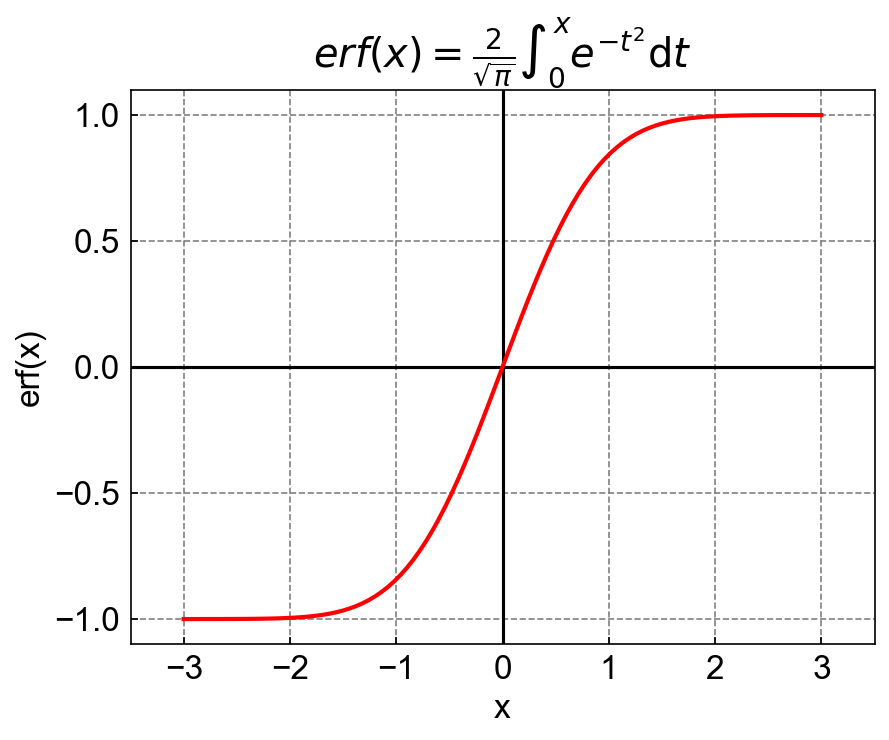

In [3]:
from scipy.special import erf

fig, ax = plt.subplots(dpi=150)

x = np.linspace(-3, 3, num=101)

ax.plot(x, erf(x), 'r-', lw=2, zorder=10)

ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-1.1, 1.1)
ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_xlabel(r'x')
ax.set_ylabel(r'erf(x)')

ax.set_title(r"$erf(x) = \frac{2}{\sqrt{\pi}}\int^x_0{e^{-t^2}\mathrm{d}t}$")

ax.grid(ls='--', color='grey')
ax.axvline(0, c='k', lw=1.5, zorder=5)
ax.axhline(0, c='k', lw=1.5, zorder=5)

plt.show()

<font color=blue size=4>

## 3. (30分) 将像函数$\displaystyle{\bar{f}(p)=\frac{6}{(p+1)^4}}$反演（即由像函数求取原函数）。

</font>

<font color=blue size=4>解1：</font>

<font color=black size=4>

易知$p=-1$是四阶极点，用课本中公式(4.1.13)
$$
\mathrm{Res}\,f(z_0) = \lim_{z\to z_0}\frac{1}{(m-1)!}\left\{ \frac{\mathrm{d}^{m-1}}{\mathrm{d}z^{m-1}}[(z-z_0)^m\,f(z)] \right\}
$$
所以，
$$
\mathrm{Res}[\bar{f}(-1)e^{-1\cdot t}] = \lim_{p\to -1}\frac{1}{3!}\left\{\frac{\mathrm{d}^3}{\mathrm{d}z^3}\left[(p+1)^4\cdot\frac{6e^{pt}}{(p+1)^4}\right]\right\} = \frac{1}{6}\lim_{p\to -1}6t^3e^{pt}=t^3e^{-t}
$$
由课本中公式(6.2.2)可以知道原函数为
$$
f(t) = \mathrm{Res}[\bar{f}(p)e^{pt}] = t^3 e^{-t}
$$
</font>

<font color=blue size=4>解2：</font>

<font color=black size=4>

查拉普拉斯变换函数表，可以知道
$$
\mathcal{L}(t^n) = \frac{n!}{p^{n+1}}
$$
我们观察像函数可以写成:
$$
\bar{f}(p) = \frac{6}{(p+1)^4} = \frac{3!}{(p+1)^4}
$$
可以令$p'=p+1$， 则
$$
f(t') = \mathcal{L}^{-1}\left(\frac{3!}{p'^4}\right) = t'^3
$$
再考虑位移定理
$$
e^{-\lambda t}f(t) = \mathcal{L}^{-1}[f(p+\lambda)]
$$
所以像函数$\displaystyle{\bar{f}(p)=\frac{6}{(p+1)^4}}$的原函数为
$$
f(t) = \mathrm{Res}[\bar{f}(p)e^{pt}] = t^3 e^{-t}
$$

</font>

<font color=blue size=4>

## 4. (30分) 求取像函数$\displaystyle{\bar{j}(p)=\frac{E}{Lp^2+Rp+\frac{1}{C}}}$的原函数。这里$E$、$L$、$R$、$C$皆为常数。

</font>

<font color=blue size=4>解：</font>

<font color=black size=4>

在课堂PPT的基础上，依据$\displaystyle{\Delta = R^2-\frac{4L}{C}}$的符号，我们可以进一步把极点分为三种情况：

$$
p_{1,2} = 
\begin{cases}
\frac{-R\pm\sqrt{R^2-\frac{4L}{C}}}{2L}, &  \Delta > 0 \\
-\frac{R}{2L}, & \Delta = 0 \\
\frac{-R\pm\mathrm{i}\sqrt{\frac{4L}{C}-R^2}}{2L}, & \Delta < 0
\end{cases}
$$

对于单极点情况：

$$
\begin{align}
\mathrm{Res}[\bar{j}[p_1]e^{p_1 t}] &= \frac{E}{L(p_1-p_2)}\cdot e^{p_1 t} \\
\mathrm{Res}[\bar{j}[p_2]e^{p_2 t}] &= \frac{E}{L(p_2-p_1)}\cdot e^{p_2 t} \\
j(t) &= \frac{E}{L(p_1-p_2)}\cdot e^{p_1 t} + \frac{E}{L(p_2-p_1)}\cdot e^{p_2 t}
\end{align}
$$

当$\Delta>0$时，$p_1$、$p_2$皆为负实数，由于$e$指数的作用，电流单调衰减，称为<font color=red size=4>过阻尼</font>：
    
$$
j(t) = \frac{E\cdot e^{-\frac{Rt}{2L}}}{\sqrt{R^2-\frac{4L}{C}}}\left(e^{\frac{t\sqrt{R^2-\frac{4L}{C}}}{2L}}-e^{-\frac{t\sqrt{R^2-\frac{4L}{C}}}{2L}}\right) = \frac{2E\cdot e^{-\frac{Rt}{2L}}}{\sqrt{R^2-\frac{4L}{C}}}\mathrm{sh}\left(\frac{\sqrt{R^2-\frac{4L}{C}}}{2L}\cdot t\right)
$$

</font>

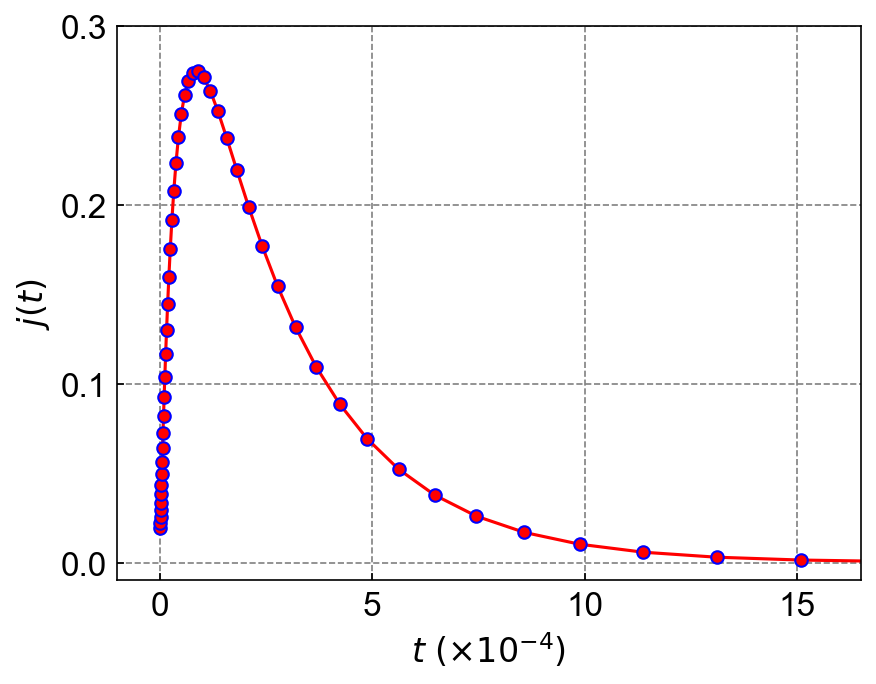

In [4]:
def fun1(E,R,L,C,t):
    return 2*E*np.exp(-R*t/2/L)*np.sinh(t*np.sqrt(R**2.0-4*L/C)/2/L)/np.sqrt(R**2-4*L/C)

t = 2*np.logspace(-6, -3, 50)

E=5
R=15
L=5e-4
C=2e-5

j = fun1(E,R,L,C,t)

fig, ax =plt.subplots(dpi=150)

ax.plot(t, j, '-o', color='red', mec='blue')

ax.set_xlim(-1e-4, 0.00165)
ax.set_ylim(-1e-2, 0.3)
ax.set_xticks([0,5e-4, 1e-3, 1.5e-3])
ax.set_xticklabels(['0','5','10','15'])
ax.set_yticks([0,0.1,0.2,0.3])
ax.set_xlabel(r'$t\ (\times 10^{-4})$')
ax.set_ylabel(r'$j(t)$')
ax.grid(ls='--', c='gray')
plt.show()

<font color=black size=4>

当$\Delta<0$时，$p_1$、$p_2$皆为复数，由于$e$指数的作用，电流震荡衰减，称为<font color=red size=4>欠阻尼</font>：
$$
j(t) = \frac{E}{\mathrm{i}\sqrt{\frac{4L}{C}-R^2}}\cdot e^{-\frac{Rt}{2L}}\left(e^{\frac{\mathrm{i}\sqrt{\frac{4L}{C}-R^2}\cdot t}{2L}}-e^{-\frac{\mathrm{i}\sqrt{\frac{4L}{C}-R^2}\cdot t}{2L}}\right) = \frac{2E}{\sqrt{\frac{4L}{C}-R^2}}\cdot e^{-\frac{Rt}{2L}}\sin{\frac{\sqrt{\frac{4L}{C}-R^2}\cdot t}{2L}}
$$

</font>

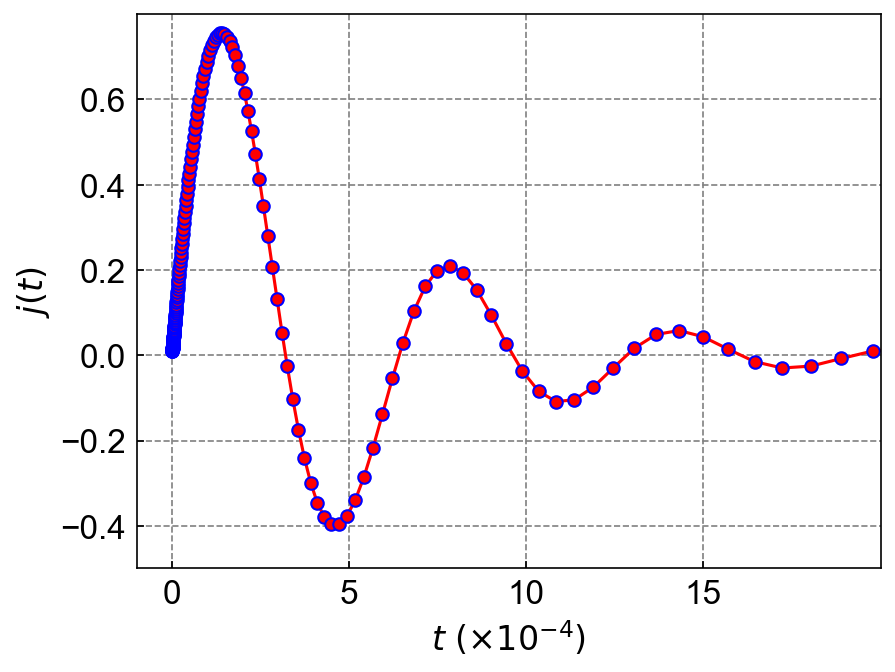

In [5]:
def fun1(E,R,L,C,t):
    return 2*E*np.exp(-R*t/2/L)*np.sin(t*np.sqrt(4*L/C-R**2)/2/L)/np.sqrt(4*L/C-R**2)

t = np.logspace(-6, -2, 200)

E=5
R=2
L=5e-4
C=2e-5

j = fun1(E,R,L,C,t)

fig, ax =plt.subplots(dpi=150)

ax.plot(t, j, '-o', color='red', mec='blue')

ax.set_xlim(-1e-4, 0.002)
ax.set_ylim(-0.5, 0.8)
ax.set_xticks([0,5e-4, 1e-3, 1.5e-3])
ax.set_xticklabels(['0','5','10','15'])
ax.set_yticks([-0.4,-0.2,0.0,0.2,0.4,0.6])
ax.set_xlabel(r'$t\ (\times 10^{-4})$')
ax.set_ylabel(r'$j(t)$')
ax.grid(ls='--', c='gray')
plt.show()

<font color=black size=4>

2阶极点的情况，即当$\Delta=0$时，$p_1=p_2=\displaystyle{-\frac{R}{2L}}$，此时单调衰减，称为<font color=red size=4>临界阻尼</font>
$$
j(t) = \mathrm{Res}(p_1) = \frac{1}{1!}\lim_{p\to p_1}\frac{\mathrm{d}}{\mathrm{d}p}\left[(p-p_1)^2\cdot\frac{E}{L(p-p_1)e^{pt}}\right] = \frac{E}{L}te^{-\frac{R}{2L}t}
$$

</font>

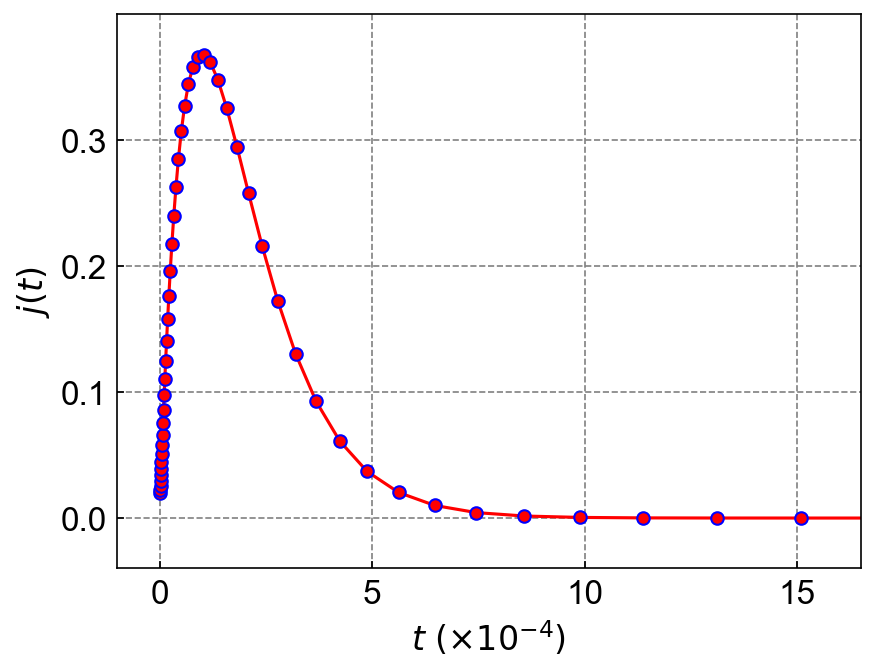

In [6]:
def fun1(E,R,L,C,t):
    return E*np.exp(-R*t/2/L)*t/L

t = 2*np.logspace(-6, -3, 50)

E=5
R=10
L=5e-4
C=2e-5

j = fun1(E,R,L,C,t)

fig, ax =plt.subplots(dpi=150)

ax.plot(t, j, '-o', color='red', mec='blue')

ax.set_xlim(-1e-4, 0.00165)
ax.set_ylim(-4e-2, 0.4)
ax.set_xticks([0,5e-4, 1e-3, 1.5e-3])
ax.set_xticklabels(['0','5','10','15'])
ax.set_yticks([0,0.1,0.2,0.3])
ax.set_xlabel(r'$t\ (\times 10^{-4})$')
ax.set_ylabel(r'$j(t)$')
ax.grid(ls='--', c='gray')
plt.show()